In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('dataset/measurements.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [17]:
# Drop the specials column as its data is already encoded in other columns
df.drop('specials', axis=1, inplace=True)

In [18]:
# Further clean the data
df['distance'] = df['distance'].apply(lambda x: float(x.replace(",",'.')))
df['consume'] = df['consume'].apply(lambda x: float(x.replace(",",'.')))
df['temp_inside'] = df['temp_inside'].apply(lambda x: float(str(x).replace(",",'.')))

df['temp_inside'].fillna(df['temp_inside'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   gas_type       388 non-null    object 
 6   AC             388 non-null    int64  
 7   rain           388 non-null    int64  
 8   sun            388 non-null    int64  
 9   refill liters  13 non-null     object 
 10  refill gas     13 non-null     object 
dtypes: float64(3), int64(5), object(3)
memory usage: 33.5+ KB


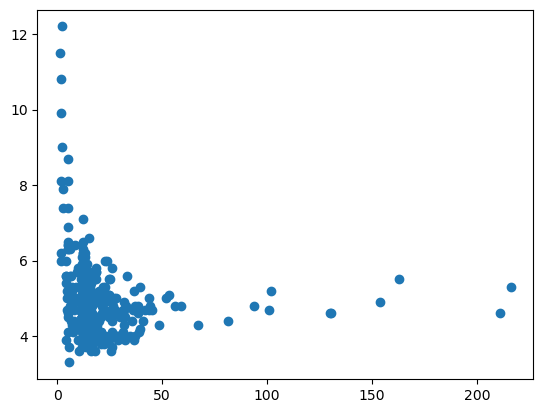

In [22]:
# Visualize the data

# Distance travelled vs liter per kilometer
plt.scatter(df['distance'], df['consume'])
#route length and fuel consumption seem inversely correlated

array([[<Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'consume'}>],
       [<Axes: title={'center': 'speed'}>,
        <Axes: title={'center': 'temp_inside'}>],
       [<Axes: title={'center': 'temp_outside'}>, <Axes: >]], dtype=object)

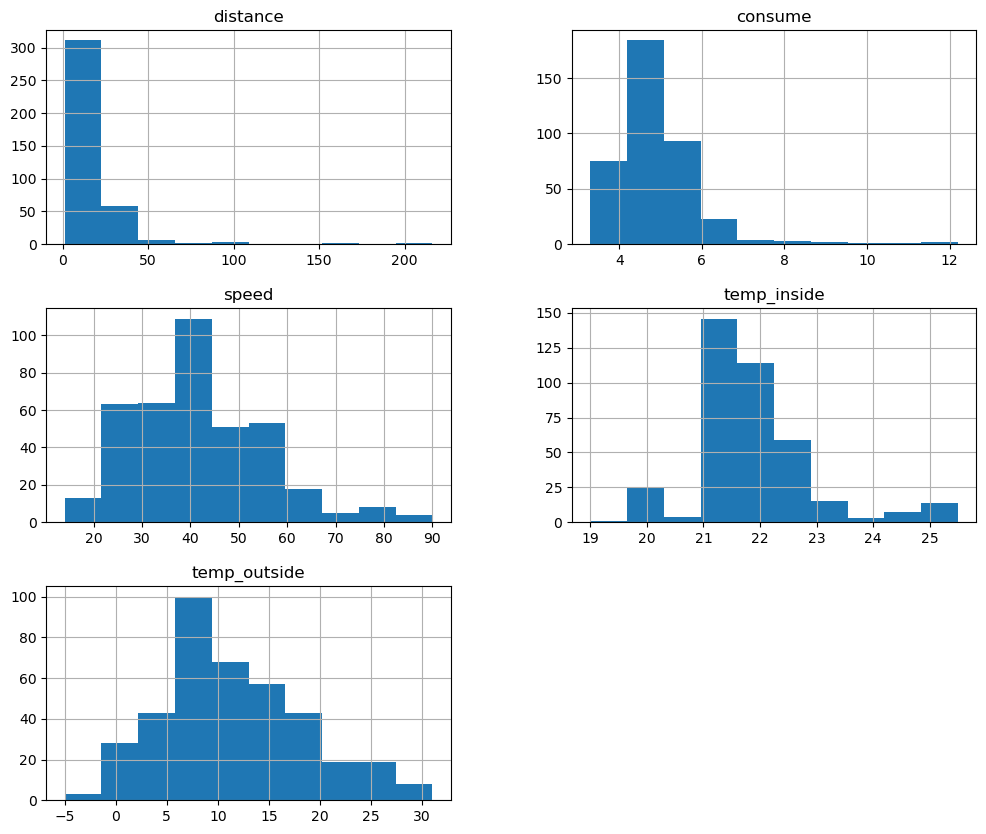

In [28]:
# Histogram to check distribution of numerical data
df.drop(['AC','rain','sun'], axis=1).hist(figsize=(12,10))

<Axes: >

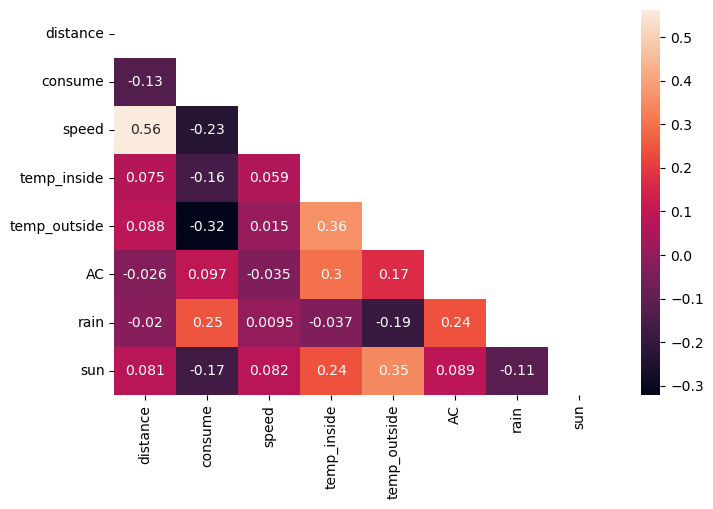

In [31]:
# Correlation matrix
fig = plt.figure(figsize=(8,5))
numerical = df.select_dtypes(include=np.number)
corr = numerical.corr()
sns.heatmap(corr,annot=True,mask=np.triu(corr))

# Distance and consume don't seem actually so much correlated
# There is a moderate correlation between speed and distance

In [46]:
# Feature engineering the liter_used column to get the liter used for every trip
df['liter_used'] = df['distance'] * df['consume'] / 100
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,liter_used
0,28.0,5.0,26,21.5,12,E10,0,0,0,45,E10,1.4000
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN,NaN,0.5040
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN,NaN,0.6160
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN,NaN,0.5031
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN,NaN,0.8325
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,NaN,NaN,0.5920
384,16.1,4.3,38,25.0,31,SP98,1,0,0,NaN,NaN,0.6923
385,16.0,3.8,45,25.0,19,SP98,0,0,0,NaN,NaN,0.6080
386,15.4,4.6,42,25.0,31,SP98,1,0,0,NaN,NaN,0.7084


In [47]:
pivot_table =  pd.pivot_table(df, values=['liter_used','distance'], columns='gas_type', aggfunc='sum')
pivot_table

gas_type,E10,SP98
distance,3375.4000,4249.900
liter_used,161.4292,201.465


In [49]:
ratio_e10 = pivot_table.iloc[1,0] / pivot_table.iloc[0,0] * 100
ratio_sp98 = pivot_table.iloc[1,1] / pivot_table.iloc[0,1] * 100
print("E10 ratio:", ratio_e10)
print("SP98 ratio:", ratio_sp98)

print("\n You consume slightly more with E10 than with SP98!!")

E10 ratio: 4.782520590152278
SP98 ratio: 4.740464481517213

 You consume slightly more with E10 than with SP98!!


In [53]:
e10_cost = 1.379
sp98_cost = 1.459
print("Cost of fuel for 100 kilometer with E10:", ratio_e10 * e10_cost)
print("Cost of fuel for 100 kilometer with SP98:", ratio_sp98 * sp98_cost)

print("\nConclusion: the best fuel according to the data is E10!!")

Cost of fuel for 100 kilometer with E10: 6.595095893819991
Cost of fuel for 100 kilometer with SP98: 6.916337678533614

Conclusion: the best fuel according to the data is E10!!
